# SPAM DETECTION IN EMAIL AND SMS USING NLP

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split 
from sklearn import metrics

We start by importing all the necessary modules as we see in the first cell

In [3]:
mails = pd.read_csv('nlpspamdetection.csv',encoding = 'latin-1')
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We load the dataset and then find the head of the dataset, which is a sample of the dataset. In this you can see the dataset has 5 columns v1,v2,Unnamed:2, Unnamed:3 and Unnamed:4

In [4]:
mails.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
5402,spam,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5403,ham,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5404,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5405,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5406,ham,Rofl. Its true to its name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We also find the end of the dataset

In [6]:
mails = mails.drop(labels = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis = 1)
mails.columns = ["label", "mail"]

And we drop the unncessary columns such as Unnamed:1,2 and 3 and name the first 2 columns as label and mail respectively.

In [7]:
mails.head()

,label,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


EDA

We perform Exploratory Data Analysis on the dataset by finding info. description and also group them according to therm being ham or spam

In [8]:
mails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5407 non-null   object
 1   mail    5407 non-null   object
dtypes: object(2)
memory usage: 84.6+ KB


In [9]:
mails.describe()

,label,mail
count,5407,5407
unique,2,4597
top,ham,FALSE
freq,4679,471


We also find the length, count and a few visualizations of the dataset for better understanding of the categrorization as well as the length of the mail, its frequecy etc.

In [10]:
mails.groupby('label').describe().T

label          ham   spam
mail count    4679    728
     unique   4171    427
     top     FALSE  FALSE
     freq      220    251

In [11]:
mails['length'] = mails['mail'].apply(len)
mails.head()

,label,mail,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
mails['mail'].value_counts().rename_axis(['mail']).reset_index(name='counts').head()

,mail,counts
0,FALSE,471
1,"Sorry, I'll call later",29
2,I cant pick the phone right now. Pls send a me...,12
3,Ok...,10
4,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",4


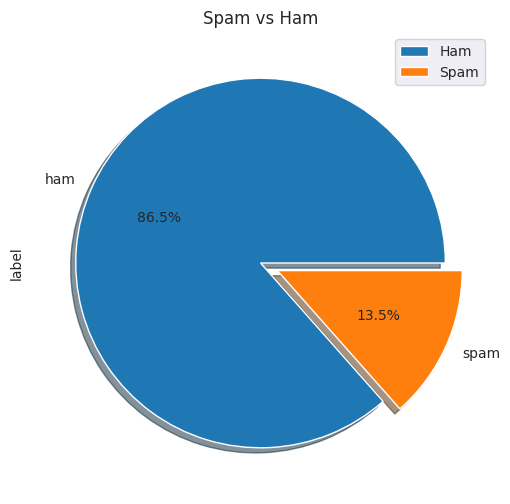

In [13]:
mails["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

Text(0, 0.5, 'Frequency')

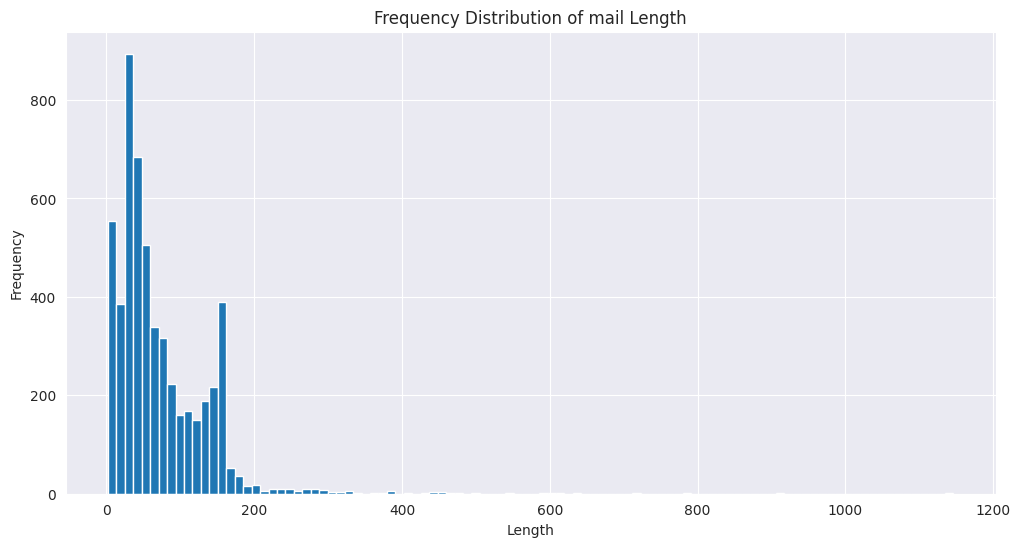

In [14]:
plt.figure(figsize=(12,6))
mails['length'].plot(bins=100, kind='hist') 
plt.title("Frequency Distribution of mail Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

In [15]:

mails['length'].describe()

count    5407.000000
mean       71.999075
std        65.577766
min         2.000000
25%        30.000000
50%        51.000000
75%       104.000000
max      1146.000000
Name: length, dtype: float64

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

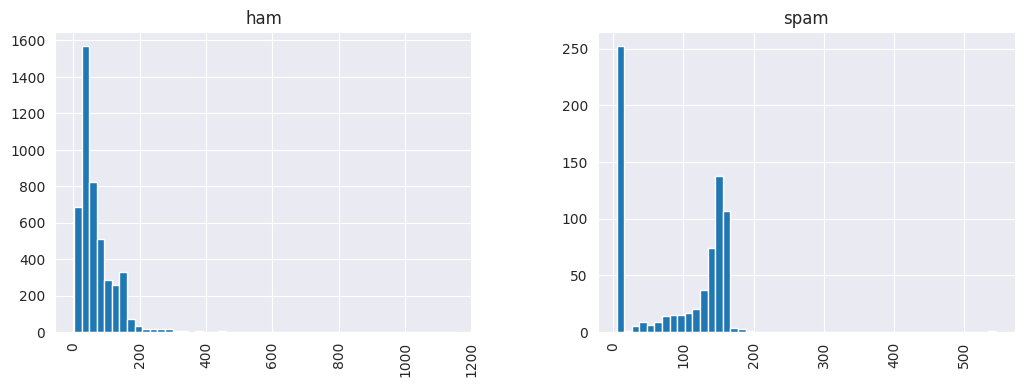

In [16]:
mails.hist(column='length', by='label', bins=50,figsize=(12,4))

Text Preprocessing

We start preprocessing the data by checking for all the punctuations , spaces etc and removing them

In [17]:
def text_preprocess(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    
    return nostop

We label the data as spam and ham and find the numberes of both

In [18]:
spam_mails = mails[mails["label"] == "spam"]["mail"]
ham_mails = mails[mails["label"] == "ham"]["mail"]
print("No of spam mails : ",len(spam_mails))
print("No of ham mails : ",len(ham_mails))

No of spam mails :  728
No of ham mails :  4679


We perform the function on the spam mails to get the spam and ham mails

In [19]:

!pip install nltk
import nltk
nltk.download('stopwords')
spam_words = text_preprocess(spam_mails)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


We find a few spam words and also plot a wordcloud for the words and print the top ten spam words and their value count

In [20]:

spam_words[:10]

['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may']

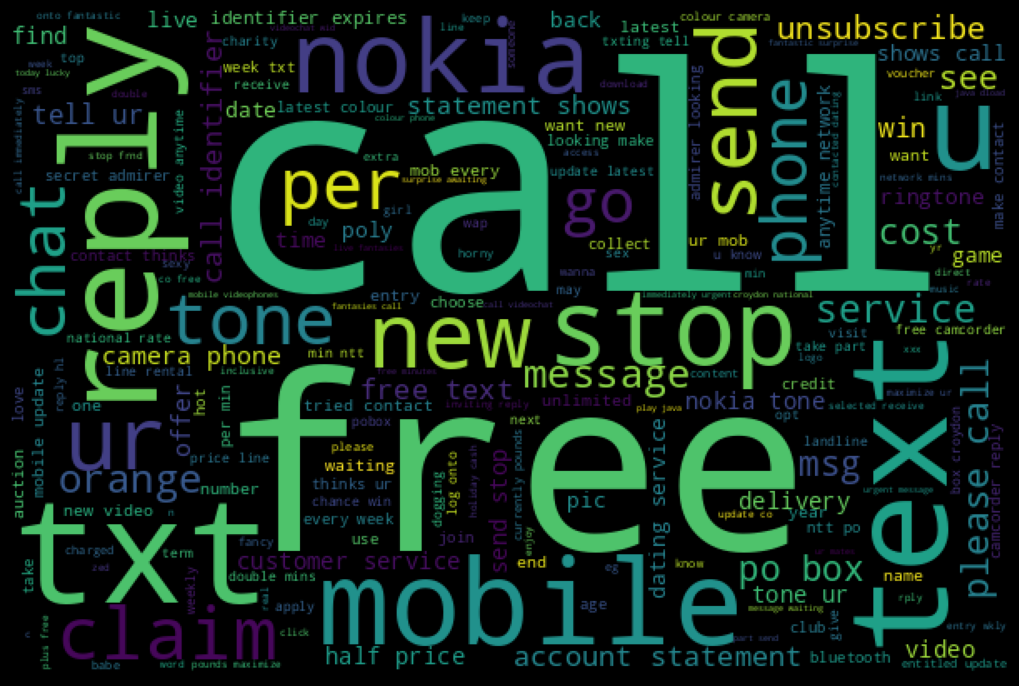

In [21]:
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [22]:
print("Top 10 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(10))

Top 10 Spam words are :

call      200
free      121
reply      86
ur         85
txt        83
text       73
mobile     65
stop       63
get        60
u          55
dtype: int64


Performing the same process as before on ham mails

In [23]:
ham_words = text_preprocess(ham_mails)

In [24]:
ham_words[:10]

['go',
 'jurong',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'cine']

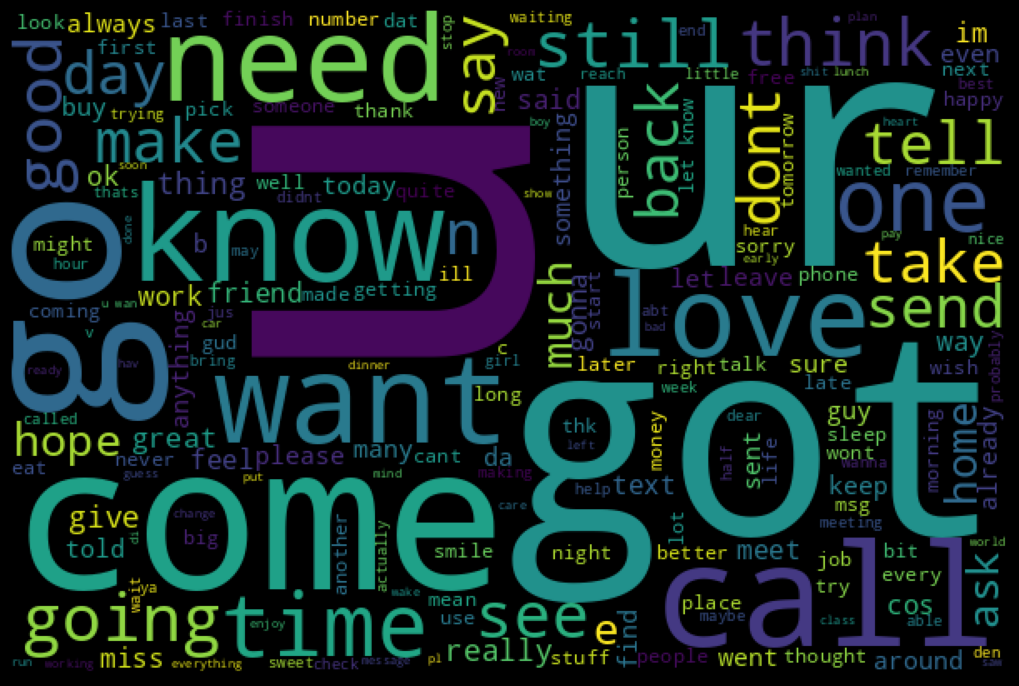

In [25]:
ham_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [26]:
print("Top 10 Ham words are :\n")
print(pd.Series(ham_words).value_counts().head(10))

Top 10 Ham words are :

u       766
get     267
ur      220
go      208
got     196
like    196
know    195
call    194
come    181
want    143
dtype: int64


DATA TRANSFORMATION- Again, we just analyze the mails again like before and remove the punctuations and stopwords

In [27]:
mails.head()

,label,mail,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
mails["mail"] = mails["mail"].apply(text_preprocess)

In [29]:
mails["mail"] = mails["mail"].agg(lambda x: ' '.join(map(str, x)))

In [30]:
mails.head()

,label,mail,length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts may...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah dont think goes usf lives around though,61


In [31]:
mails["mail"][7]

'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune'

VECTORIZATION- We already have the mails as lists of tokens, or lemmas, and we now need to transform each of these mails into a vector that the algorithm models for SciKit Learn can use.

We will now translate each mail, which was previously represented as a list of tokens (lemmas), into a vector that computer learning models can comprehend.

In [32]:
vectorizer = CountVectorizer()
bow_transformer = vectorizer.fit(mails['mail'])

print("20 Bag of Words (BOW) Features: \n")
print(vectorizer.get_feature_names_out()[20:40])

print("\nTotal number of vocab words : ",len(vectorizer.vocabulary_))

20 Bag of Words (BOW) Features: 

['abstract' 'abt' 'abta' 'aburo' 'abuse' 'abusers' 'ac' 'academic' 'acc'
 'accent' 'accenture' 'accept' 'access' 'accidant' 'accident'
 'accidentally' 'accommodation' 'accomodate' 'accomodations' 'accordin']

Total number of vocab words :  7609


We take one text mail and get its bag-of-words counts and then we do its vector representation

In [33]:
mail4 = mails['mail'][3]
print(mail4)

u dun say early hor u c already say


In [34]:
bow4 = bow_transformer.transform([mail4])
print(bow4)
print(bow4.shape)

  (0, 188)	1
  (0, 1858)	1
  (0, 1876)	1
  (0, 3019)	1
  (0, 5635)	2
(1, 7609)


This indicates that mail number 4 has five distinct words (after removing common stop words). Checking and confirming which one shows twice now

In [35]:
print(bow_transformer.get_feature_names_out()[5945])
print(bow_transformer.get_feature_names_out()[207])
print(bow_transformer.get_feature_names_out()[1981])
print(bow_transformer.get_feature_names_out()[2000])
print(bow_transformer.get_feature_names_out()[3141])

sleepingwith
amigos
enters
erm
ignorant


In [36]:
mails_bow = bow_transformer.transform(mails['mail'])

In [37]:
mail3 = mails['mail'][2]
print(mail3)

free entry wkly comp win fa cup final tkts may text fa receive entry questionstd txt ratetcs apply


In [38]:
bow3= bow_transformer.transform([mail3])
print(bow3)
print(bow3.shape)

  (0, 295)	1
  (0, 1239)	1
  (0, 1441)	1
  (0, 1989)	2
  (0, 2116)	2
  (0, 2236)	1
  (0, 2380)	1
  (0, 4002)	1
  (0, 5216)	1
  (0, 5265)	1
  (0, 5315)	1
  (0, 6569)	1
  (0, 6713)	1
  (0, 6902)	1
  (0, 7340)	1
  (0, 7377)	1
(1, 7609)


Now we transform the full DataFrame of mails using transform on our Bag-of-Words (bow) modified object. Let's take a look at the big, sparse matrix that represents the bag-of-words counts for the full corpus:

In [39]:
print('Shape of Sparse Matrix: ', mails_bow.shape)
print('Amount of Non-Zero occurences: ', mails_bow.nnz)

Shape of Sparse Matrix:  (5407, 7609)
Amount of Non-Zero occurences:  39163


In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(mails_bow)

In [41]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 5635)	0.6247267490280508
  (0, 3019)	0.5078575809172499
  (0, 1876)	0.3682748177619581
  (0, 1858)	0.3501240574054375
  (0, 188)	0.3059149711636756


In [42]:
tfidf3 = tfidf_transformer.transform(bow3)
print(tfidf3)

  (0, 7377)	0.22444733556996904
  (0, 7340)	0.1807862950211177
  (0, 6902)	0.1482385697819683
  (0, 6713)	0.24930754432349686
  (0, 6569)	0.13761786755897926
  (0, 5315)	0.19673628630006235
  (0, 5265)	0.24930754432349686
  (0, 5216)	0.24930754432349686
  (0, 4002)	0.17187607754653453
  (0, 2380)	0.12774557773831666
  (0, 2236)	0.20863286683106275
  (0, 2116)	0.4986150886469937
  (0, 1989)	0.42237166180622726
  (0, 1441)	0.22897020557727982
  (0, 1239)	0.22052944736206315
  (0, 295)	0.18274305848012024


we are performing the tfidf for the mail4

Then , we check IDF of the word 'say'

In [43]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['say']])

5.226186765255778


We transform the entire bag-of-words corpus into TF-IDF 

In [44]:
mails_tfidf = tfidf_transformer.transform(mails_bow)
print(mails_tfidf.shape)

(5407, 7609)


In [45]:
mails["mail"][:10]

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts may...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
5                                                false
6       even brother like speak treat like aids patent
7    per request melle melle oru minnaminunginte nu...
8                                                false
9    mobile months u r entitled update latest colou...
Name: mail, dtype: object

We train and test our data to check our model's accuracy

In [46]:

msg_train, msg_test, label_train, label_test = \
train_test_split(mails_tfidf, mails['label'], test_size=0.2)

In [47]:
print("train dataset features size : ",msg_train.shape)
print("train dataset label size", label_train.shape)

print("\n")

print("test dataset features size", msg_test.shape)
print("test dataset lable size", label_test.shape)

train dataset features size :  (4325, 7609)
train dataset label size (4325,)


test dataset features size (1082, 7609)
test dataset lable size (1082,)


We build Naive Bayes classifier model using Scikit-learn and perform prediction of spam vs ham classification

In [48]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
spam_detect_model = clf.fit(msg_train, label_train)

In [49]:
predict_train = spam_detect_model.predict(msg_train)

In [50]:
print("Classification Report \n",metrics.classification_report(label_train, predict_train))
print("\n")
print("Confusion Matrix \n",metrics.confusion_matrix(label_train, predict_train))
print("\n")
print("Accuracy of Train dataset : {0:0.3f}".format(metrics.accuracy_score(label_train, predict_train)))

Classification Report 
               precision    recall  f1-score   support

         ham       0.92      1.00      0.96      3747
        spam       1.00      0.47      0.64       578

    accuracy                           0.93      4325
   macro avg       0.96      0.74      0.80      4325
weighted avg       0.93      0.93      0.92      4325



Confusion Matrix 
 [[3747    0]
 [ 306  272]]


Accuracy of Train dataset : 0.929


In [51]:
print('predicted:', spam_detect_model.predict(tfidf3)[0])
print('expected:', mails['label'][2])

predicted: spam
expected: spam


In [52]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', mails['label'][3])

predicted: ham
expected: ham


In [53]:
label_predictions = spam_detect_model.predict(msg_test)
print(label_predictions)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


Finally, we modulate our data and find the accuracy of our model and as we see here, the accuracy of our model is 90.9% which is a fair enough accuracy.

In [54]:
print(metrics.classification_report(label_test, label_predictions))
print(metrics.confusion_matrix(label_test, label_predictions))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       932
        spam       1.00      0.37      0.54       150

    accuracy                           0.91      1082
   macro avg       0.95      0.68      0.74      1082
weighted avg       0.92      0.91      0.89      1082

[[932   0]
 [ 95  55]]


In [55]:
print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(label_test, label_predictions)))

Accuracy of the model : 0.912


In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
# Create a LinearSVC model and train it on the training data
model = LinearSVC()
model.fit(msg_train, label_train)

# Use the model to make predictions on the testing data
label_pred = model.predict(msg_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(label_test, label_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9399260628465804
